# TP3 - Stochastic process generation
Eliott Van Dieren - epfl

In [166]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import erf
import math
from scipy.fft import fft,ifft
import scipy.integrate as integrate
import scipy.special as special
import tim
from random import randint

## 1. Fractional Brownian motion (stationary)

In [167]:
def cov_delta(x,h,H):
    return 0.5*(np.abs(x-h)**(2*H)+np.abs(x+h)**(2*H)) -np.abs(x)**(2*H)

In [168]:
H = 0.5
n = 100
h = 1/n
grid = np.arange(0,1+h,h)

In [169]:
grid

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [177]:
alpha = np.array([cov_delta(t,h,H) for t in grid] + [cov_delta(grid[-(i+1)],h,H) for i in range(1,len(grid[1:n+1]))])
len(alpha)

200

In [171]:
fft_alpha = fft(alpha)

In [172]:
Y_R,Y_I = np.random.randn(2,2*n)

In [173]:
Y = Y_R + 1j*Y_I

In [174]:
X_tilde = ifft(np.sqrt(2)*np.diag(np.sqrt(fft_alpha))@Y)

X_1 = X_tilde.real[:n+1]
X_2 = X_tilde.imag[:n+1]

print(len(X_1))
print(len(X_2))

101
101


In [175]:
B = [np.sum(X_1[0:k]) for k in range(n+1)]

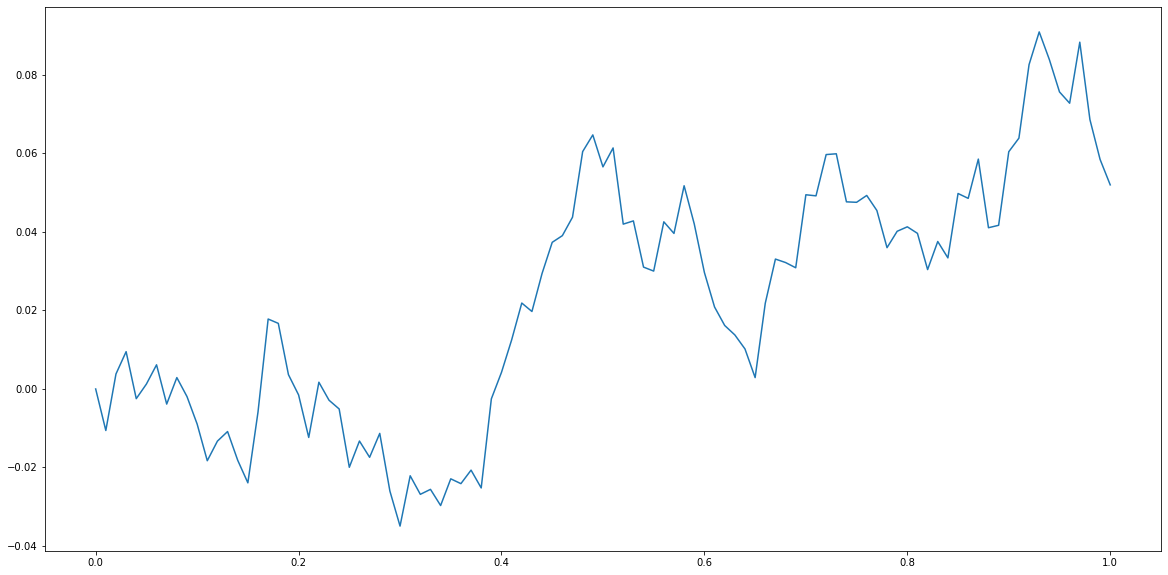

In [176]:
fig, ax = plt.subplots(1,figsize=(20,10))
plt.plot(grid,B)
plt.show()

## 2. Random Walk generator

In [224]:
n = 1000
a = 0.3
X = np.zeros(n+1)

In [225]:
U = np.random.uniform(0.0,1.0,n)

In [226]:
for i,u in enumerate(U):
    if u<a:
        X[i+1] = X[i]+1
    elif u<2*a:
        X[i+1] = X[i]-1
    else:
        X[i+1] = X[i]

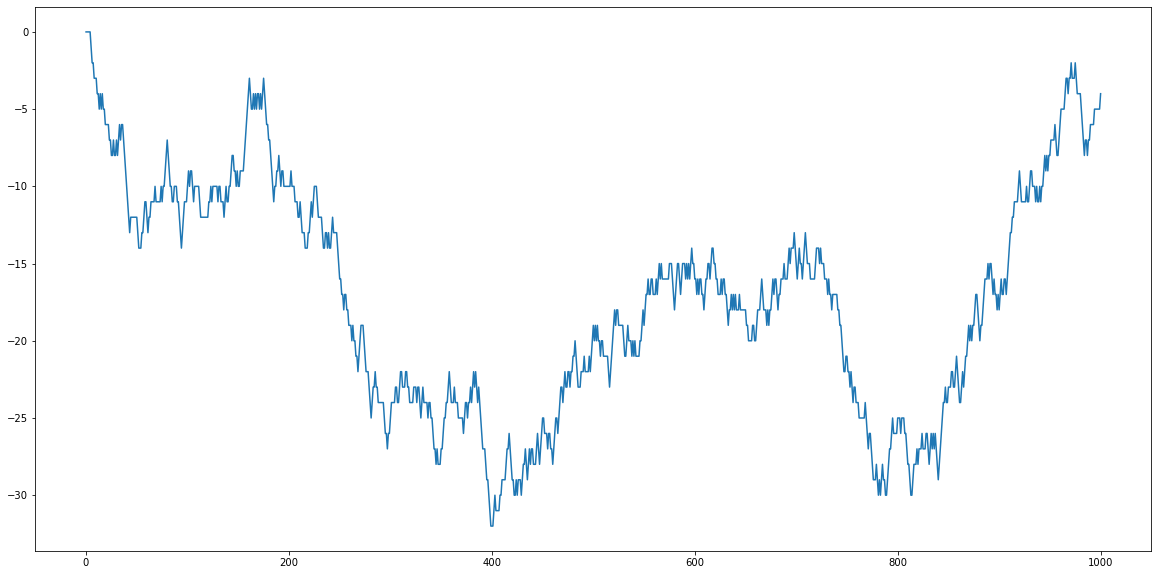

In [227]:
fig, ax = plt.subplots(1,figsize=(20,10))
plt.plot(np.arange(n+1),X)
plt.show()

In [229]:
dt = 0.01
Y = np.sqrt(dt/(2*a))*X

In [230]:
# see page 27 for Wiener process generation

In [232]:
W = np.zeros(n+1)
for k in range(1,n+1):
    dW = np.random.randn(1)*np.sqrt((k*dt-(k-1)*dt))
    W[k] = W[k-1]+dW

In [233]:
W

array([ 0.        ,  0.0103077 , -0.03263412, ..., -2.16831117,
       -2.24588492, -2.20137733])